# Домашняя работа 4. Кластеризация.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту ml-teachers ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #4: Name Surname`. Если тема будет неправильная, то задание не будет проверено.

**Дедлайн**: 19.11.2017 00:00 OMSK

    После дедлайна можно сдать, но вы получите штраф по баллам в рейтинге.

**Рассылка решений**: 23.11.2017 17:00 OMSK

    После рассылки задания совсем не имеют веса.

### Полезная литература

- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

In [1]:
!pip3 install numpy pandas scipy sklearn matplotlib seaborn Pillow scikit-image

## 1. Изображения (6 баллов)

С помощью алгоритмов кластеризации можно уменьшить число цветов в изображении. В данном случае будут кластеризоваться похожие пиксели. Такой подход позволяет перейти к суперпиксельному представлению изображений, которое является более компактным и используется в задачах компьютерного зрения.

Загрузим картинку `data/bird.jpg` с помощью scikit-image и выведите ее с помощью matplotlib.

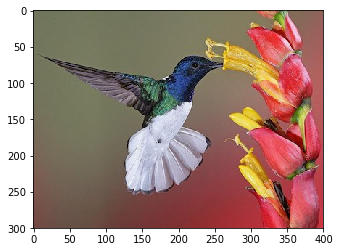

In [2]:
%matplotlib inline
from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np

img = imread("./../data/bird.jpg")
plt.imshow(img)

In [3]:
import skimage

### 1.1 Scale (0.5 балла)

Если вы посмотрите на содержимое numpy массива, в котором хранится изображение, то увидите, что там будут числа от 0 до 255. Нам лучше перейти к числам от 0 до 1. 

**Преобразуйте вашу матрицу, как сказано выше.**

**Hint**: Это можно сделать с помощью функции `skimage.img_as_float`.

[[[ 0.43529412  0.45882353  0.35686275]
  [ 0.43529412  0.45882353  0.35686275]
  [ 0.43529412  0.45882353  0.35686275]
  ..., 
  [ 0.56078431  0.38823529  0.35294118]
  [ 0.56078431  0.38823529  0.35294118]
  [ 0.56862745  0.38431373  0.35294118]]

 [[ 0.43529412  0.45882353  0.35686275]
  [ 0.43529412  0.45882353  0.35686275]
  [ 0.43921569  0.4627451   0.36078431]
  ..., 
  [ 0.56078431  0.38823529  0.35294118]
  [ 0.56862745  0.38431373  0.35294118]
  [ 0.56862745  0.38431373  0.35294118]]

 [[ 0.43921569  0.4627451   0.36078431]
  [ 0.43921569  0.4627451   0.36078431]
  [ 0.43921569  0.4627451   0.36078431]
  ..., 
  [ 0.56078431  0.38823529  0.35294118]
  [ 0.56470588  0.38039216  0.34901961]
  [ 0.56470588  0.38039216  0.34901961]]

 ..., 
 [[ 0.45098039  0.2745098   0.25490196]
  [ 0.45098039  0.2745098   0.25490196]
  [ 0.44705882  0.27843137  0.25490196]
  ..., 
  [ 0.82352941  0.21176471  0.26666667]
  [ 0.79607843  0.18823529  0.25098039]
  [ 0.81568627  0.20784314  0.27058

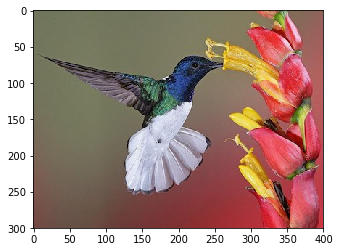

In [4]:
img = skimage.img_as_float(img)
print(img)
plt.imshow(img)

In [5]:
orig_img = img.copy()

### 1.2 Reshape (1 балл)

Мы получили матрицу размера `(300, 400, 3)`. Нам это не подходит. Чтобы запустить kMeans нам нужно иметь много-много объектов и 3 признака - значение яркости пикселя в канале Red, Green и Blue. 

**Преобразуйте матрицу так, чтобы получилась матрица размера `(120000, 3)`. **

**Hint**: Вам пригодятся функции: `np.ravel` и `np.vstack`.

In [6]:
img = np.array([np.ravel(img[: ,: , i]) for i in range(3)]).transpose()
print(img.shape)

(120000, 3)


### 1.3 Train (0.5 балла)

Отлично. У нас есть подготовленные данные. Теперь мы будем находить кластеры похожих пикселей по цвету. Для этого создайте KMeans для, например, 8 цветов. **Обучите модель** (может занять около 10 секунд). С помощью магического макроса `%time` **покажите, сколько времени у вас занимало обучение**.

In [7]:
%time
from sklearn.cluster import KMeans
model = KMeans(n_jobs=3)
model.fit(img)
%time

Wall time: 0 ns
Wall time: 0 ns


In [8]:
model.cluster_centers_.shape

(8, 3)

### 1.4 Draw centroids (1 балл)

**Нарисуйте с помощью imshow центры кластеров**: будет 8 пикселей со средним цветом по всему кластеру. 
Это называется цветовой палитрой. 

**Hint**: reshape в 3 мерный массив, так как у вас будет 2-мерный

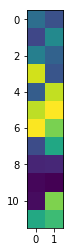

In [9]:
plt.imshow(model.cluster_centers_.reshape(12,2))

### 1.5 Draw final image (3 балла)

У нас есть значения цвета для каждого центра кластера. Каждый пиксель в результате обучения KMeans теперь имеет свой лейбл кластера. Значит мы можем заменить все пиксели на соответсвующие им центры класетров. Проведите это преобразование и выведите 8-цветное изображение.

**Hints**: `labels_`, `reshape`, `copy`, логические маски в numpy `arr[arr == 1] = 0`. У меня это 7 строк кода.

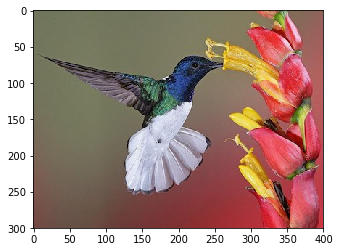

In [10]:
pic = orig_img.copy()
plt.imshow(pic) # original picture

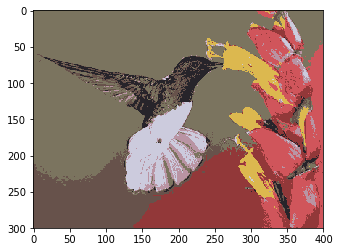

In [11]:
arr = model.labels_.reshape((300, 400))
centers = model.cluster_centers_
for i in range(centers.shape[0]):
    pic[(arr == i)] = model.cluster_centers_[i]
plt.imshow(pic) # 8-color image

## 2. Центры кластеров (6 баллов)

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare. Полный датасет доступен здесь: https://archive.org/details/201309_foursquare_dataset_umn. Но в `../../data/checkins.csv.gz` я подготовил данные и оставил только 100000 жлементов, иначе бы KMeans обучался пол дня.

Найдем на Google Maps координаты офисов компании:

```
33.751277, -118.188740 (Los Angeles)
25.867736, -80.324116 (Miami)
51.503016, -0.075479 (London)
52.378894, 4.885084 (Amsterdam)
39.366487, 117.036146 (Beijing)
-33.868457, 151.205134 (Sydney)
```

In [12]:
offices = np.array([[33.751277, -118.188740], 
[25.867736, -80.324116],
[51.503016, -0.075479], 
[52.378894, 4.885084], 
[39.366487, 117.036146],
[-33.868457, 151.205134],])

In [13]:
offices[:,0]

array([ 33.751277,  25.867736,  51.503016,  52.378894,  39.366487,
       -33.868457])

###  2.0 Read data (0.5 балла): 
**Загрузите датасет `checkins.csv.gz`. Выведите его размер, первые 5 строк таблицы, статистическиую сводку(describe) **

In [14]:
import pandas as pd
df = pd.read_csv('./../data/checkins.csv.gz', compression='gzip')
print(df.shape)
df.head(5)

(100000, 2)


,latitude,longitude
0,38.895112,-77.036366
1,33.800745,-84.410520
2,45.523452,-122.676207
3,40.764462,-111.904565
4,33.448377,-112.074037


In [15]:
df.describe()

,latitude,longitude
count,100000.000000,100000.000000
mean,36.886388,-89.396849
std,8.351517,35.579317
min,-45.031162,-159.670833
25%,33.494170,-112.074037
50%,38.646991,-87.743938
75%,40.740389,-75.163789
max,67.631479,174.908056


###  2.1 MeanShift (1 балл): 
Для данной задачи мы не знаем сколько кластеров вообще существует, и есть ли они, поэтому воспользуемся методом, который сам находит нужное количество кластеров. Используйте `MeanShift`, указав `bandwidth=0.1`, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах. Документацию по нему вы можете найти в документации SKlearn [тут](http://scikit-learn.org/stable/modules/clustering.html#mean-shift).

**Обучите кластеризатор на всех данных.** Выполнение в 4 потока на i5 заняло 2 минуты.

In [16]:
from sklearn.cluster import MeanShift
model = MeanShift(bandwidth=0.1, n_jobs=3)
model.fit(df)

MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=3, seeds=None)

### 2.2 Visualization (0.5 балла): 
**Визуализируйте с помощью matplotlib все точки из датасета** так, чтобы они были разукрашены в соответсвии с кластером к которому они принадлежат. **Добавьте на ваш график ещё точки расположений офисов**, сделайте их большими и красными, чтобы было видно. Рисовать каким-то образом карту мира под точками НЕ надо.

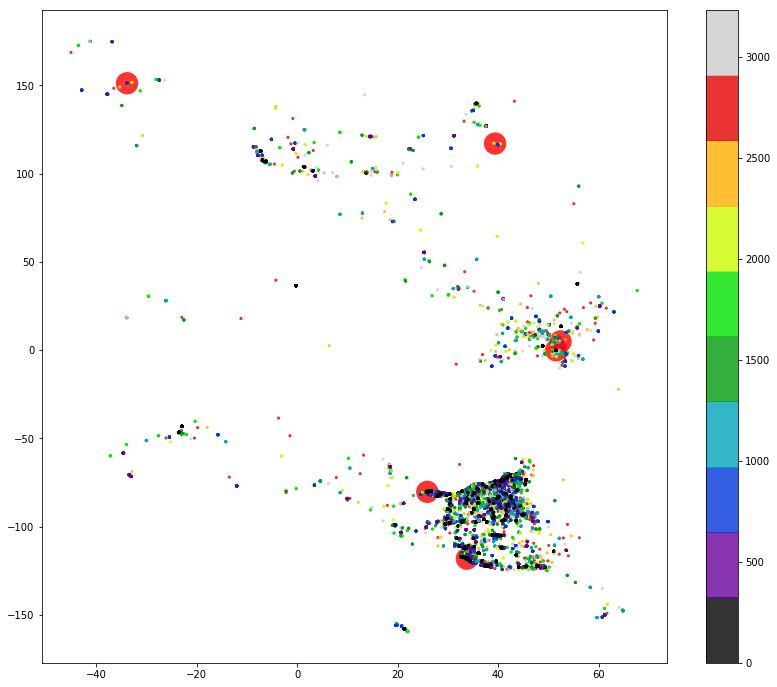

In [17]:
plt.figure(figsize=(14,12))
plt.scatter(offices[:,0], offices[:,1], c=['red'], cmap=plt.cm.get_cmap('nipy_spectral', 10),
            edgecolor='none', alpha=0.8, s=500,)
plt.scatter(df.latitude, df.longitude, c=model.labels_, cmap=plt.cm.get_cmap('nipy_spectral', 10),
            edgecolor='none', alpha=0.8, s=10,)
plt.colorbar()

###  2.3 Filter clusters (2 балла): 
Как видим на графике, некоторые из получившихся кластеров содержат слишком мало точек — такие кластеры не интересны рекламодателям. Поэтому надо определить, какие из кластеров содержат, скажем, больше 15 элементов. Центры этих кластеров и являются оптимальными для размещения. 

**Выведите количество кластеров, которое удовлетворяет этому условию.**

**Hint**: `itertools.groupby`

In [18]:
from collections import Counter
arr = model.labels_
d = Counter(arr)
#print(d)
l = []
for x in d:
    if d[x] > 15:
        # (label, count)
        l.append((x, d[x]))

In [19]:
l

[(5, 2409),
 (7, 1601),
 (30, 594),
 (65, 186),
 (1, 4692),
 (23, 747),
 (0, 12471),
 (2, 3994),
 (8, 1526),
 (137, 92),
 (235, 50),
 (11, 1081),
 (500, 21),
 (45, 342),
 (22, 754),
 (32, 449),
 (47, 273),
 (4, 3526),
 (51, 281),
 (48, 314),
 (3, 3363),
 (394, 29),
 (38, 388),
 (6, 2297),
 (79, 199),
 (145, 33),
 (10, 1298),
 (269, 49),
 (14, 714),
 (351, 37),
 (12, 1006),
 (188, 65),
 (28, 679),
 (20, 612),
 (404, 28),
 (189, 66),
 (59, 243),
 (209, 46),
 (133, 99),
 (93, 135),
 (151, 81),
 (469, 23),
 (370, 31),
 (148, 65),
 (354, 42),
 (262, 44),
 (511, 20),
 (80, 220),
 (405, 28),
 (162, 68),
 (13, 1007),
 (170, 74),
 (17, 645),
 (306, 30),
 (122, 101),
 (421, 27),
 (182, 68),
 (360, 32),
 (39, 400),
 (104, 119),
 (60, 229),
 (368, 32),
 (69, 191),
 (9, 1378),
 (108, 79),
 (61, 291),
 (522, 19),
 (539, 18),
 (169, 56),
 (68, 196),
 (16, 870),
 (484, 22),
 (149, 83),
 (126, 118),
 (280, 45),
 (100, 109),
 (434, 27),
 (66, 193),
 (21, 722),
 (147, 121),
 (41, 367),
 (19, 807),
 (236,

In [20]:
len(l)

592

In [21]:
sorted_list = sorted(d.items(), key=lambda item: -item[1])

In [22]:
sorted_list

[(0, 12471),
 (1, 4692),
 (2, 3994),
 (4, 3526),
 (3, 3363),
 (5, 2409),
 (6, 2297),
 (7, 1601),
 (8, 1526),
 (9, 1378),
 (10, 1298),
 (11, 1081),
 (13, 1007),
 (12, 1006),
 (31, 907),
 (16, 870),
 (15, 868),
 (18, 808),
 (19, 807),
 (22, 754),
 (23, 747),
 (21, 722),
 (14, 714),
 (28, 679),
 (25, 656),
 (17, 645),
 (20, 612),
 (30, 594),
 (26, 580),
 (27, 577),
 (29, 564),
 (24, 539),
 (33, 502),
 (34, 452),
 (32, 449),
 (36, 431),
 (37, 410),
 (39, 400),
 (38, 388),
 (42, 384),
 (52, 370),
 (40, 369),
 (41, 367),
 (50, 355),
 (44, 347),
 (43, 345),
 (45, 342),
 (49, 316),
 (48, 314),
 (46, 314),
 (53, 293),
 (61, 291),
 (51, 281),
 (47, 273),
 (54, 271),
 (56, 263),
 (57, 258),
 (58, 254),
 (55, 246),
 (59, 243),
 (60, 229),
 (80, 220),
 (72, 203),
 (79, 199),
 (67, 197),
 (68, 196),
 (66, 193),
 (74, 193),
 (69, 191),
 (91, 190),
 (70, 189),
 (71, 187),
 (65, 186),
 (62, 182),
 (73, 178),
 (76, 173),
 (75, 169),
 (81, 164),
 (82, 162),
 (78, 157),
 (83, 155),
 (63, 155),
 (77, 153),

###  Задание 2.4 (2 балла): 
Как мы помним, необходимо разместить только 20 баннеров близ офисов компании. Осталось определить 20 ближайших к ним центров кластеров. Т.е. посчитать дистанцию до ближайшего офиса для каждой точки и выбрать 20 с наименьшим значением.

**Выведите эти 20 центров кластеров, отсортрованных по возрастанию расстояния до ближайшего офиса.**

**Hint:** Для вычисления расстояния вы можете использовать обычную евклидову метрику и предполагать, что земля плоская. А можете использовать `geopy.distance.vincenty` если поймёте как.

In [23]:
!pip3 install geopy

In [24]:
import geopy

In [25]:
from geopy.distance import vincenty

In [26]:
# todo!!!
centers = model.cluster_centers_
lists = []
for c in centers:
    dist = vincenty(c, offices[0]).miles
    for o in offices:
        tmp = vincenty(c, o).miles
        if dist > tmp:
            dist = tmp
    lists.append((dist, c))

In [27]:
sorted(lists, key=lambda item: item[0])[0:20]

[(0.511664342893697, array([ 52.37296399,   4.89231722])),
 (0.5398192609841579, array([ -33.86063043,  151.20477593])),
 (1.55332789996043, array([ 25.84567226, -80.3188906 ])),
 (2.1597905384506153, array([ 51.50299126,  -0.12553729])),
 (4.643651546969083, array([  33.80987796, -118.14892381])),
 (8.692677588068095, array([ 25.78581242, -80.21793804])),
 (10.207813503998102, array([ -34.00190615,  151.12806905])),
 (10.653689394250703, array([ 52.388501  ,   4.63376547])),
 (11.177447752678994, array([ 51.42676329,  -0.30373207])),
 (11.462413164068225, array([ 25.70534972, -80.28342874])),
 (11.497572023536787, array([ -33.9522629,  151.0321372])),
 (12.214777931774824, array([ 51.5741517,   0.1838708])),
 (12.40593818696665, array([  33.88832534, -118.04892817])),
 (12.47929704378145, array([ 26.01009825, -80.19999059])),
 (12.500983752849375, array([ 51.50647877,  -0.36517727])),
 (13.031824588854125, array([  33.87298601, -118.36209115])),
 (13.236458500083385, array([ 52.2644, 

Координата центра кластера ближайшего к какому-то из офисов компании должны быть `(52.37296399032261, 4.8923172225806466)`. Если у вас не так, то считайте, что вы сделали что-то неправильно. 